# Task-03

**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

Sample Dateset :- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('/kaggle/input/bank-dataset/bank.csv', sep=';')
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [2]:
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [3]:
print(df['y'].value_counts())

y
no     4000
yes     521
Name: count, dtype: int64


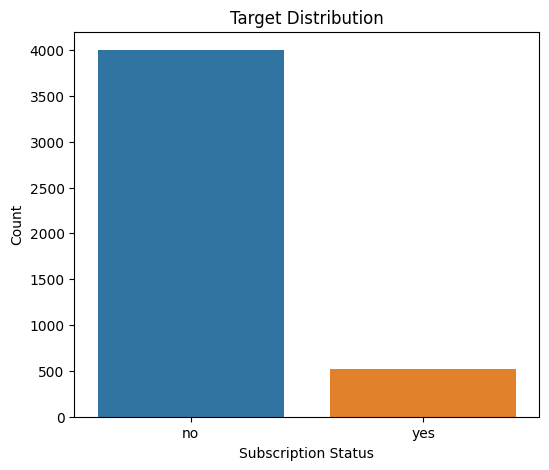

In [4]:
# Visualize the target variable distribution
plt.figure(figsize=(6,5))
sns.countplot(x='y', data=df)
plt.xlabel("Subscription Status")
plt.ylabel("Count")
plt.title('Target Distribution')
plt.show()

In [5]:
# Encode categorical features for modeling
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
prepare = df.drop('y', axis=1)
target = df['y']
prepare_train, prepare_test, target_train, target_test = train_test_split(prepare, target, test_size=0.2, random_state=42, stratify=target)

In [7]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(prepare_train, target_train)

DecisionTreeClassifier(random_state=42)

In [8]:
target_pred = clf.predict(prepare_test)
print("Accuracy:", accuracy_score(target_test, target_pred))
print("\nClassification Report:\n", classification_report(target_test, target_pred))

Accuracy: 0.856353591160221

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       801
           1       0.39      0.42      0.40       104

    accuracy                           0.86       905
   macro avg       0.66      0.67      0.66       905
weighted avg       0.86      0.86      0.86       905



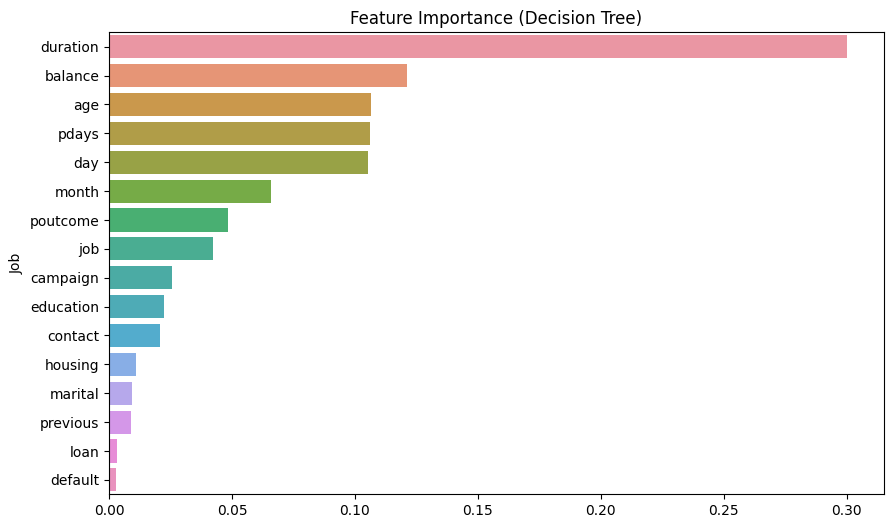

In [9]:
importances = pd.Series(clf.feature_importances_, index=prepare.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.ylabel("Job")
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [10]:
print("Top 5 Most Important Features:",importances.head() )


Top 5 Most Important Features: duration    0.300248
balance     0.121168
age         0.106715
pdays       0.106313
day         0.105336
dtype: float64
